# Intro to Data Science: Final Project

## Unknown Data Set Exploration

Bobby Davis

## Introduction

In this project I will be exploring a dataset in which I do not know what any of the columns represent. I will have to clean and process the data to the best of my ability to make the best classification predictions on a categorical variable.

We begin by importing packages we will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
# from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import recall_score, f1_score, precision_score
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from scipy.spatial import distance_matrix
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

sns.set()

## Read the data

In [2]:
df = pd.read_csv(r"C:\Users\Bobby\Desktop\383FinalProject\Bobby.csv")

## Initial data exploration

To get a general idea of the data we will be working with it is always good to check the number of columns and rows in the data set. We also want to know what type of values we will be working with, especially since the column names are all obscured.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 12 columns):
x0     6193 non-null object
x1     5850 non-null object
x2     5748 non-null float64
x3     6193 non-null object
x4     6193 non-null object
x5     6193 non-null object
x6     6193 non-null object
x7     5964 non-null object
x8     6193 non-null object
x9     6193 non-null float64
x10    6193 non-null float64
y      6193 non-null object
dtypes: float64(3), object(9)
memory usage: 580.7+ KB


,x2,x9,x10
count,5748.000000,6193.000000,6193.000000
mean,32.175191,64.863862,2280.280793
std,24.523418,30.120177,2264.747992
min,0.000000,18.400000,0.000000
25%,9.000000,35.450000,391.700000
50%,29.000000,70.400000,1401.400000
75%,55.000000,89.950000,3795.450000
max,72.000000,118.750000,8684.800000


The dataset has a total of 6193 rows and 12 columns starting out.
All of the columns except for x2, x9, and x10 appear to be categorical.
Let us now look at the distribution of variables in the target column y.

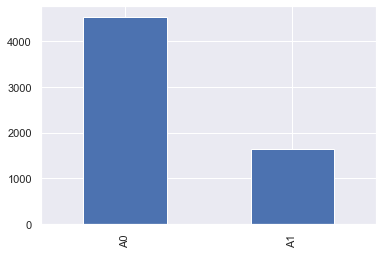

In [4]:
df['y'].value_counts().plot(kind='bar')

Another aspect that may be interesting to look at is any correlations between the numeric variables.

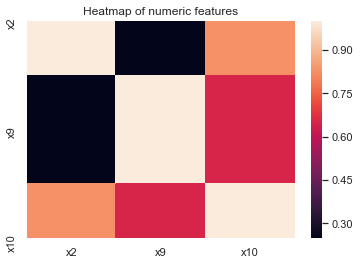

In [5]:
sns.heatmap(df.corr())
plt.title("Heatmap of numeric features");

Columns x2 and x10 appear to be very strongly correlated.

Let's look to see if we have any NA values in our data.


TOTAL Sum NA VALUES IN DF:
1017

TOTAL Percentage NA VALUES IN DF:
0.013684805425480381

SUM OF NA VALUES FOR EACH COLUMN:
x2     445
x1     343
x7     229
y        0
x10      0
x9       0
x8       0
x6       0
x5       0
x4       0
x3       0
x0       0
dtype: int64


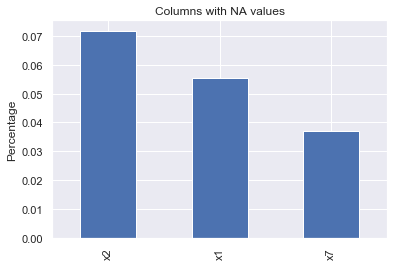

In [6]:
print("\nTOTAL Sum NA VALUES IN DF:")
total_NA = df.isna().sum().sum()
print(str(total_NA))

print("\nTOTAL Percentage NA VALUES IN DF:")
frac_NA = df.isna().mean().mean()
print(str(frac_NA) + "\n")

print("SUM OF NA VALUES FOR EACH COLUMN:")
sum_NA = df.isna().sum().sort_values(ascending=False)
print(str(sum_NA))

frac_NA = df.isna().mean().sort_values(ascending=False)
# plot columns NA values
frac_NA[frac_NA > 0].plot.bar()
plt.title('Columns with NA values')
plt.ylabel('Percentage');

Columns x2, x1, and x7 all contain NA values, but the totals appear to be very minimal.
Let's check how many row we would lose if we dropped all of the rows with na values.

In [7]:
temp = df
temp.shape

(6193, 12)

In [8]:
temp.dropna(inplace=True)
df.shape

(5236, 12)

We would lose about 15 percent of our rows if dropped all of the na values.
Since we lost a decent chunck of data and the amount of na values is quite low it may be a better idea to impute these columns.
We will use the mean x2 which is numerical. We will us the mode for x1 and x7 which are categorical.

Next, let's get an idea of what the distribution of each value in all of the columns looks like.

In [9]:
for col in df:
  print("column: " + col)
  print(df[col].value_counts())

column: x0
A0    2663
A1    2573
Name: x0, dtype: int64
column: x1
A1    3683
A0    1553
Name: x1, dtype: int64
column: x2
1.0     461
72.0    273
2.0     181
3.0     151
4.0     134
       ... 
28.0     39
38.0     38
36.0     37
39.0     36
0.0       8
Name: x2, Length: 73, dtype: int64
column: x3
A2    2515
A1    2204
A0     517
Name: x3, dtype: int64
column: x4
A1         2315
A0         1794
A2         1122
unknown       5
Name: x4, dtype: int64
column: x5
A1    2098
A0    2016
A2    1122
Name: x5, dtype: int64
column: x6
A0    2095
A2    2019
A1    1122
Name: x6, dtype: int64
column: x7
A1    2913
A0    1249
A2    1074
Name: x7, dtype: int64
column: x8
A1    3099
A0    2137
Name: x8, dtype: int64
column: x9
20.05     44
19.95     35
19.70     35
19.85     33
19.90     33
          ..
71.25      1
28.50      1
105.80     1
34.20      1
31.00      1
Name: x9, Length: 1476, dtype: int64
column: x10
20.20      9
0.00       8
19.90      7
19.65      7
19.75      6
          ..
3442.80

If you look at column x4 there are 5 values listed as 'unknown'. This is a very small number of rows so we will delete these indefinitely.
No categorical columns appear to have too many variables.



## Data preprocessing

Remove the unknown values we discovered.

In [10]:
df.shape
df = df[(df['x4']!='unknown')]
df.shape

(5231, 12)

Impute the missing values we discovered.

In [11]:
# replace NA with mean in x2
x2_mean = df['x2'].mean()
df['x2'].fillna(x2_mean)

# replace NA with mode in x1
m = df['x1'].value_counts().index[0]
df['x1'].fillna(m)

# replace NA with mode in x7
m = df['x7'].value_counts().index[0]
df['x7'].fillna(m)

1       A1
2       A1
3       A1
4       A1
5       A2
        ..
6188    A1
6189    A0
6190    A1
6191    A2
6192    A2
Name: x7, Length: 5231, dtype: object

Since the target variable is categorical we will convert the numerical columns to categorical columns. Each column will be split into 3 categories. The categories will be small, medium, and large.

In [12]:
quantiles = df['x2'].quantile([0, 0.33, 0.66, 1])
df['x2'] = pd.cut(df['x2'],
include_lowest=True, bins=quantiles,
labels=['small', 'medium', 'large'])

quantiles = df['x9'].quantile([0, 0.33, 0.66, 1])
df['x9'] = pd.cut(df['x9'],
include_lowest=True, bins=quantiles,
labels=['small', 'medium', 'large'])

quantiles = df['x10'].quantile([0, 0.33, 0.66, 1])
df['x10'] = pd.cut(df['x10'],
include_lowest=True, bins=quantiles,
labels=['small', 'medium', 'large'])

## Data visualization

Here we will do some basic grouped bar plots since our data is now all categorical. We will try to check for relations between our target y and other columns since we do not really know what any of the columns in the dataset mean.

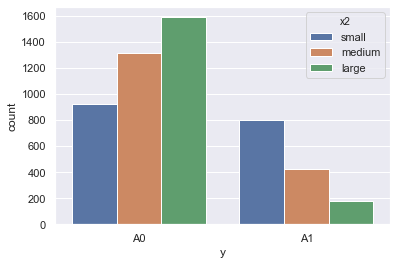

In [13]:
sns.countplot(x='y', hue='x2', data=df);

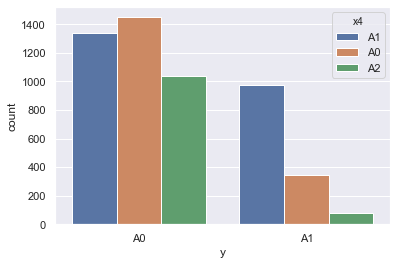

In [14]:
sns.countplot(x='y', hue='x4', data=df);

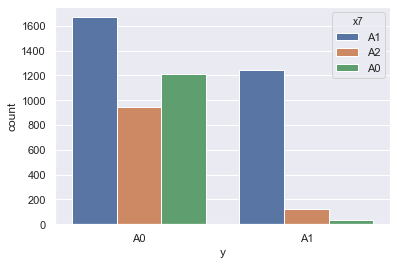

In [15]:
sns.countplot(x='y', hue='x7', data=df);

Let's look at x2 and x10 since our heatmap showed them to have such a strong correlation.

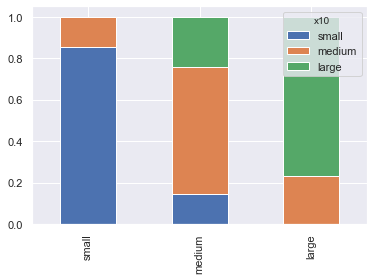

In [16]:
tbl = pd.crosstab(df['x2'], df['x10'])
tbl = tbl.div(df['x2'].value_counts(), axis=0)
tbl.plot.bar(stacked=True);

## Machine learning

Before we begin machine learning we will use the function get_dummies provided by pandas to convert all of the data to numerical values. We must do this since we are working with Scikit-Learn.

In [17]:
df2 = pd.get_dummies(df, drop_first = True)

In [18]:
def print_conf_mtx(y_true, y_pred, classes=None):
    """ Print a confusion matrix (two classes only). """
    
    if not classes:
        classes = ['neg', 'pos']
   	 
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left   	= '{:<10s}'.replace('10',str(n))
    right  	= '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    
    cm = confusion_matrix(y_test, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))

In [19]:
def forward_selection(cap, X_train, y_train, method):
    remaining = list(range(X_train.shape[1]))
    selected = []
    n = cap
    while len(selected) < n:
        min_acc = -1e7
        for i in remaining:
            X_i = X_train[:,selected+[i]]
            scores = cross_val_score(method, X_i, y_train, scoring='accuracy', cv=10)
            accuracy = scores.mean() 
            if accuracy > min_acc:
                min_acc = accuracy
                i_min = i

        remaining.remove(i_min)
        selected.append(i_min)
        print('Feature Count: {}; Accuracy: {:.2f}'.format(len(selected), min_acc))
    return selected

## Model 1: Tree Classifier without forward selection and without grid search

Tree classfiers tend to be quite flexible. Implementing a tree model with as many predictors as possible will give us a good starting point.

In [20]:
np.random.seed(50)
X = df2.drop(labels=['y_A1'], axis=1).values # predictors
y = df2['y_A1'].values #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

clf1 = DecisionTreeClassifier(random_state=0);
clf1.fit(X_train, y_train);

Since we used as many predictors as possible and we did not put a limit on the tree depth, our tree will be quite big. For this reason we will not be graphing the first tree. We can however still take a look at the confusion matrix, accuracy and learning curve to see how well the model performed.

In [21]:
print("Baseline Accuracy: {:.3}".format(1-y_train.mean()))
y_predict = clf1.predict(X_test)
print("Accuracy of Model: {:.3}".format((y_predict == y_test).mean()))

Baseline Accuracy: 0.733
Accuracy of Model: 0.775


Our model was just a bit more accurate then our calculated baseline accuracy.

In [22]:
print_conf_mtx(y_test, y_predict)

       predicted 
actual   neg  pos
neg     1000  145
pos      208  217


Our first tree model is doing pretty well for predicting negative, but predicting positive seems to be a bit harder.

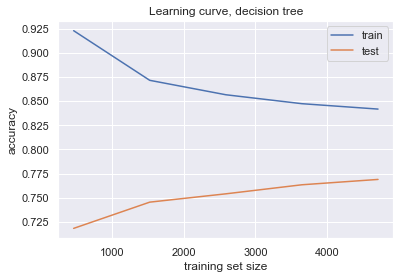

In [23]:
train_sizes, train_scores, test_scores = learning_curve(clf1, X, y, 
cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, decision tree')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.legend()


Looking at the learning curve we can see the is quite a large gap between the training and test accuracy. We can also see that the model is doing better on the training data than it is on the test data.

# Model 2: Tree classification with forward selection and grid search

Next we will try implementing forward regression to find the best predictors for our second tree model. We will also implemnt a grid search function to find the best parameters to tune our model with.

In [24]:
np.random.seed(50)
X = df2.drop(labels=['y_A1'], axis=1).values # predictors
y = df2['y_A1'].values #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)
# clf2 = DecisionTreeClassifier(random_state=0);
# choosing features using forward selection
# selected = forward_selection(5, X_train, y_train, clf2)
selected = forward_selection(5, X_train, y_train, DecisionTreeClassifier(random_state=0))

Feature Count: 1; Accuracy: 0.73
Feature Count: 2; Accuracy: 0.73
Feature Count: 3; Accuracy: 0.73
Feature Count: 4; Accuracy: 0.73
Feature Count: 5; Accuracy: 0.77


It looks like we have to use a minimum of 5 features to get any kind of boost in accuracy.

In [25]:
predictors = df2.columns[selected[0:5]].values
print("5 best features:", predictors)

5 best features: ['x0_A1' 'x1_A1' 'x2_medium' 'x7_A1' 'x4_A1']


In [26]:
scoring = make_scorer(accuracy_score)
grid = [{'max_depth': [i for i in range(10,15)], 'min_samples_leaf':[2,3,4,5], 'max_features': [i for i in range(2,7)]
         , 'random_state':[50]}]

# Using grid search to determine which parameters work best
clf2 = GridSearchCV(DecisionTreeClassifier(random_state=0), grid, scoring=scoring, cv=10)
clf2 = DecisionTreeClassifier(random_state=0)

clf2.fit(X_train[:,selected], y_train);

This tree should be a bit smaller so let's go ahead and graph it.

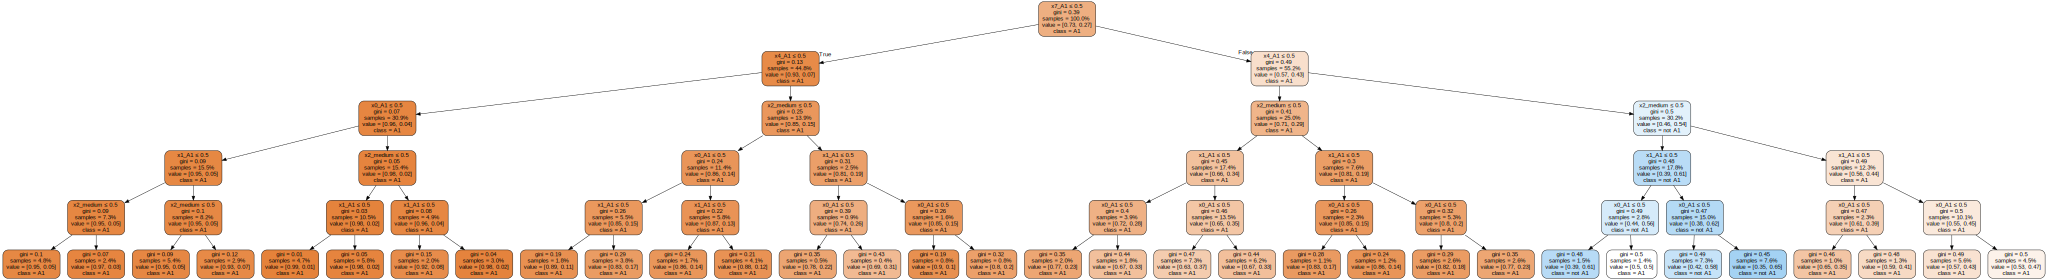

In [27]:
target_names = ['A1', 'not A1']
dot_data = export_graphviz(clf2, precision=2,
feature_names=df2[predictors].columns.values,
proportion=True,
class_names=target_names,
filled=True, rounded=True,
special_characters=True)
#plot tree
graph = graphviz.Source(dot_data)
graph

In [28]:
print("Baseline Accuracy: {:.3}".format(1-y_train.mean()))
y_predict = clf2.predict(X_test[:,selected])
print("Accuracy of Model: {:.3}".format((y_predict == y_test).mean()))

Baseline Accuracy: 0.733
Accuracy of Model: 0.761


Unfortunately our accuracy has gone down a little bit, but not by much.
If we look at the confusion matric, this model did better on predicting negative, but worse on predicting positive.

In [29]:
print_conf_mtx(y_test, y_predict)

       predicted 
actual   neg  pos
neg     1028  117
pos      259  166


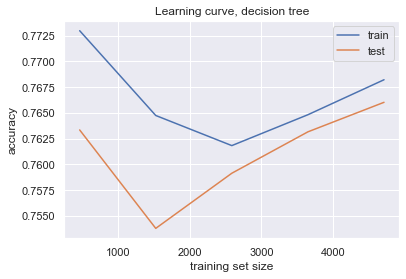

In [30]:
train_sizes, train_scores, test_scores = learning_curve(clf2, X[:,selected], y, 
cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, decision tree')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.legend()

Again the tree model did better on the traning data then on the test data. The accuracy also appears to increase as more training data is provided.

# logistic regression

# Model 3: logistic regression without forward selection

Let's try another model and see if it does better then the two tree models above.

In [31]:
X = df2.drop(labels=['y_A1'], axis=1).values #predictors
y = df2['y_A1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

log1 = LogisticRegression()
log1.fit(X_train, y_train)
print("Baseline accuracy: {:.2f}".format(1-y_train.mean()))
print("Logistic regression accuracy: {:.2}".format(log1.score(X_test, y_test)))

Baseline accuracy: 0.73
Logistic regression accuracy: 0.8


Just from looking at the accuracy we can it looks like logistic regression is doing a much better job at predicting.

In [32]:
y_pred = log1.predict(X_test)
print_conf_mtx(y_test, y_pred)

       predicted 
actual   neg  pos
neg     1024  121
pos      191  234


Looking at the confusion matrix we can see that we only got 1024 right for negative as opposed to model 2 which got 1028 right. This model has done much better on predicting positive than the first 2 models. Let's see what the learning curve looks like.

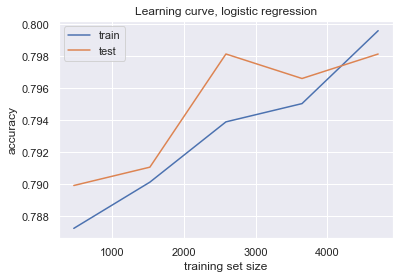

In [33]:
train_sizes, train_scores, test_scores = learning_curve(log1, X, y, 
cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, logistic regression')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.legend()

Unlike the first two models, model 3 is doing a better job on the test data than on the training data. There is a bit of variance. The accuracy is also increasing as more data is provided. Overall this is the best model for predicting y so far.

# Model 4: logistic regression with forward selection

Next let's try implementing forward selection to see if we can do even better.

In [34]:
X = df2.drop(labels=['y_A1'], axis=1).values #predictors
y = df2['y_A1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
log2 = LogisticRegression()
selected = forward_selection(5, X_train, y_train, log2)
log2.fit(X_train[:,selected], y_train)

Feature Count: 1; Accuracy: 0.73
Feature Count: 2; Accuracy: 0.73
Feature Count: 3; Accuracy: 0.73
Feature Count: 4; Accuracy: 0.73
Feature Count: 5; Accuracy: 0.75


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictors = df2.columns[selected[0:5]].values
print("5 best features:", predictors)

5 best features: ['x0_A1' 'x1_A1' 'x2_medium' 'x3_A1' 'x2_large']


In [36]:
print("Baseline accuracy: {:.3f}".format(1-y_train.mean()))
print("Logistic regression accuracy: {:.3}".format(log2.score(X_test[:,selected], y_test)))

Baseline accuracy: 0.733
Logistic regression accuracy: 0.747


Using less features has decreased our accuracy by about 5 percent.

In [37]:
y_predict7 = log2.predict(X_test[:,selected])
print_conf_mtx(y_test, y_predict7)

       predicted 
actual   neg  pos
neg     1101   44
pos      353   72


Looking at this confusion matrix has predicted the most negative out of any model, but the amount that were actually positive is also the highest it has been yet.

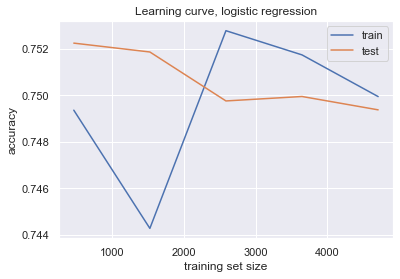

In [38]:
train_sizes, train_scores, test_scores = learning_curve(log2, X[:,selected], y, 
cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.title('Learning curve, logistic regression')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.legend()

This learning curve is a bit surprising as the training data is all over the place. The test prediction start out well, but slowly deacrease in accuracy as the training set increases.

## Conclusions

I generated 4 different models and used two different learning algorithms.
Overall model 3 did the best job at classifying y.
Model 4 did not do as well as I thought it would. Maybe using feature selection was not a good idea.
The learning curves for the two tree models did not come out well even though the accuracy was not bad.